# Efeitos de postagens sobre a quantidade de compartilhamentos

# Marca de cosméticos e métricas no Facebook - Análise de dataset do Facebook para aprendizagem de máquina com Python

Dataset disponível no link https://archive.ics.uci.edu/ml/datasets/Facebook+metrics


# Objetivos: 
Analisar o dataset para predição do desempenho de postagem a partir dos dados. O indicador será "compartilhamento" das postagens.

O arquivo csv baixado teve os dados separados por vírgula ( ; ), sendo salvo como facebook_5.csv.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('facebook_5.csv')

# VARIÁVEIS E INTERPRETAÇÃO DO SEU SIGNIFICADO
O banco de dados original tem as colunas listadas abaixo. Reduzi os seus nomes diretamente no arquivo csv pelo Excel, para otimizar o espaço das tabelas, quando forem analisadas. 
Pela identificação das colunas, deduzi o significado de cada um, embora seja preciso verificar os dados para me certificar.


**COLUNAS             - INTERPRETAÇÃO**

CARACTERÍSTICAS CONHECIDAS A PRIORI

**Page total likes**	- A página do Facebook passa a ser seguida quando recebe um like. A quantidade de likes refere-se à quantidade de pessoas seguindo a página. Os seguidores têm mais probabilidade de serem impactados pelos posts.

**Type**	- As postagens foram no Status e na timelime. Foram fotos, links e vídeos.

**Category**	- Não consegui descobrir o significado deste atributo.

**Post Month**	- Mês da postagem (de 1 a 12).

**Post Weekday**	- Dia da postagem (de 1 a 7).

**Post Hour**	- Hora de postagem.

**Paid**	- A postagem pode ser impulsionada (paga) ou não.


ATRIBUTOS PARA AVALIAÇÃO DO IMPACTO DAS POSTAGENS


Lifetime Post Total Reach	- - Alcance total vitalício da postagem.

Lifetime Post Total Impressions	- Impressões totais vitalícias da postagem.

Lifetime Engaged Users	- Engajamento vitalício dos usuários.

Lifetime Post Consumers - Consumidores vitalícios dos posts.

Lifetime Post Consumptions	- Consumo vitalício dos posts.

Lifetime Post Impressions by people who have liked your Page	- Período vitalício de impressão dos posts por seguidos da página.

Lifetime Post reach by people who like your Page	- Período vitalício de alcance dos posts por seguidores da página.

Lifetime People who have liked your Page and engaged with your post	- Período vitalício de engajamento de pessoas que curtiram o post e seguiam a página.


Comment	- Número de comentários para o post.

Like	- Número de curtidas para o post.

Share	- Número de compartilhametos do post.

Total Interactions - Total de interações (comentários).

In [3]:
df.shape

(500, 19)

In [9]:
df.columns

Index(['Page total likes', 'Type', 'Category', 'Post_Month', 'Post_Weekday',
       'Post_Hour', 'Paid', 'Lifetime_Post_T_R', 'L_Post_T_Imp',
       'Lif_Eng_Users', 'L_Post_Cons', 'L_Post_Consump', 'L_P_i_l_Page',
       'L_l_Page', 'L_P_P_y_p', 'comment', 'like', 'share', 'T_Interact'],
      dtype='object')

In [13]:
df.head(5)

,Page total likes,Type,Category,Post_Month,Post_Weekday,Post_Hour,Paid,Lifetime_Post_T_R,L_Post_T_Imp,Lif_Eng_Users,L_Post_Cons,L_Post_Consump,L_P_i_l_Page,L_l_Page,L_P_P_y_p,comment,like,share,T_Interact
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Page total likes   500 non-null    int64  
 1   Type               500 non-null    object 
 2   Category           500 non-null    int64  
 3   Post_Month         500 non-null    int64  
 4   Post_Weekday       500 non-null    int64  
 5   Post_Hour          500 non-null    int64  
 6   Paid               499 non-null    float64
 7   Lifetime_Post_T_R  500 non-null    int64  
 8   L_Post_T_Imp       500 non-null    int64  
 9   Lif_Eng_Users      500 non-null    int64  
 10  L_Post_Cons        500 non-null    int64  
 11  L_Post_Consump     500 non-null    int64  
 12  L_P_i_l_Page       500 non-null    int64  
 13  L_l_Page           500 non-null    int64  
 14  L_P_P_y_p          500 non-null    int64  
 15  comment            500 non-null    int64  
 16  like               499 non

In [6]:
df[['comment', 'like', 'share', 'T_Interact']].describe()

,comment,like,share,T_Interact
count,500.00000,499.000000,496.000000,500.000000
mean,7.48200,177.945892,27.266129,212.120000
std,21.18091,323.398742,42.613292,380.233118
min,0.00000,0.000000,0.000000,0.000000
25%,1.00000,56.500000,10.000000,71.000000
50%,3.00000,101.000000,19.000000,123.500000
75%,7.00000,187.500000,32.250000,228.500000
max,372.00000,5172.000000,790.000000,6334.000000


In [9]:
df[['Post_Month', 'Post_Weekday',      
 'Post_Hour',          
 'Paid', ]].describe()

,Post_Month,Post_Weekday,Post_Hour,Paid
count,500.000000,500.000000,500.000000,499.000000
mean,7.038000,4.150000,7.840000,0.278557
std,3.307936,2.030701,4.368589,0.448739
min,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,0.000000
50%,7.000000,4.000000,9.000000,0.000000
75%,10.000000,6.000000,11.000000,1.000000
max,12.000000,7.000000,23.000000,1.000000


In [10]:
df[['Lifetime_Post_T_R',   
'L_Post_T_Imp',
'Lif_Eng_Users',     
 'L_Post_Cons',          
 'L_Post_Consump',   
 'L_P_i_l_Page',        
 'L_l_Page',             
 'L_P_P_y_p']].describe()

,Lifetime_Post_T_R,L_Post_T_Imp,Lif_Eng_Users,L_Post_Cons,L_Post_Consump,L_P_i_l_Page,L_l_Page,L_P_P_y_p
count,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000
mean,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000
std,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618
min,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000
25%,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000
50%,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000
75%,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000
max,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000


In [55]:
id_counts.head() #A manioria das postagens não foram impulsionadas (pagas).

0.0    360
1.0    139
Name: Paid, dtype: int64

In [8]:
import numpy as np

Como as variáveis estão expressas nas colunas do dataset

In [14]:
df['Type'].value_counts() 
#As postagens foram no Status e no timelime, em formato de fotos, links e vídeos

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

A página em que os posts foram publicados variou a quantidade de seguidores de 93577 a 136393 de janeiro a dezembro de 2014 (foram publicadas em 2014.)

In [15]:
df['Page total likes'].value_counts()

136393    18
124940    17
129600    15
138895    14
139441    14
          ..
93042      1
91437      1
91972      1
133451     1
93577      1
Name: Page total likes, Length: 90, dtype: int64

In [18]:
df['Type'].value_counts() #Há desequilíbro no percentual de fotos (85%), por isso lidaremos apenas com fotos.

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

In [19]:
df['Paid'].value_counts() #Quantas postagens foram pagas (1,0) ou não (0.0)

0.0    360
1.0    139
Name: Paid, dtype: int64

38,6% das postagem foram impulsionadas (pagas).

A quantidade de postagens mensais variou, iniciando com 25 postagens ao mês, e atingindo o número máximo de postagens no mês 10.

In [56]:
df['Post_Month'].value_counts()

10    60
7     52
4     50
12    50
6     49
11    45
5     37
3     36
9     36
8     34
2     26
1     25
Name: Post_Month, dtype: int64

In [13]:
df['Post_Weekday'].value_counts() 

7    82
6    81
4    72
1    68
5    67
2    66
3    64
Name: Post_Weekday, dtype: int64

In [38]:
df['Category'].value_counts() # Esta variável é não pôde ter seu significado inferido. 

1    215
3    155
2    130
Name: Category, dtype: int64

In [15]:
df['Post_Hour'].value_counts()

3     105
10     78
13     52
11     44
2      39
4      35
9      30
12     29
6      16
5      13
7      13
14     13
8      12
15      6
1       4
17      3
18      3
16      1
19      1
20      1
22      1
23      1
Name: Post_Hour, dtype: int64

In [16]:
df['Lifetime_Post_T_R'].value_counts()

3414     2
32208    2
9528     2
3754     2
13544    2
        ..
3384     1
63840    1
3100     1
3418     1
4094     1
Name: Lifetime_Post_T_R, Length: 485, dtype: int64

In [17]:
df['L_Post_T_Imp'].value_counts()

6503     2
12735    2
4372     2
8533     2
7004     2
        ..
1374     1
5230     1
3611     1
35161    1
7165     1
Name: L_Post_T_Imp, Length: 494, dtype: int64

In [26]:
df['Lif_Eng_Users'].value_counts()

537     4
735     3
517     3
564     3
206     3
       ..
363     1
1383    1
1382    1
357     1
2552    1
Name: Lif_Eng_Users, Length: 414, dtype: int64

In [27]:
df['L_Post_Cons'].value_counts()


298     3
513     3
642     3
482     3
182     3
       ..
334     1
333     1
331     1
325     1
1023    1
Name: L_Post_Cons, Length: 422, dtype: int64

In [28]:
df['L_Post_Consump'].value_counts()


599     3
719     3
889     3
513     3
730     3
       ..
1410    1
1408    1
383     1
379     1
3599    1
Name: L_Post_Consump, Length: 440, dtype: int64

In [29]:
df['L_P_i_l_Page'].value_counts()


4911     2
5732     2
1210     2
1284     2
2888     2
        ..
15678    1
6461     1
3382     1
17717    1
26622    1
Name: L_P_i_l_Page, Length: 491, dtype: int64

In [30]:
df['L_l_Page'].value_counts()


1674     2
1722     2
5348     2
2644     2
3216     2
        ..
18880    1
4454     1
1943     1
8548     1
27328    1
Name: L_l_Page, Length: 469, dtype: int64

In [31]:
df['L_P_P_y_p'].value_counts()


403     5
340     4
327     4
363     4
392     3
       ..
584     1
701     1
1724    1
187     1
1020    1
Name: L_P_P_y_p, Length: 382, dtype: int64

In [32]:
df['comment'].value_counts()


0      106
2       71
1       62
4       44
3       36
6       26
5       20
7       20
9       15
10      11
8        8
11       8
12       7
18       6
20       5
16       5
17       4
13       4
14       3
25       3
19       3
26       2
45       2
36       2
33       2
30       2
15       2
24       2
22       2
144      1
146      1
51       1
103      1
64       1
60       1
58       1
56       1
23       1
47       1
42       1
41       1
38       1
37       1
29       1
21       1
372      1
Name: comment, dtype: int64

In [39]:
df['like'].value_counts()


98.0      7
72.0      6
79.0      6
7.0       6
148.0     6
         ..
1372.0    1
285.0     1
92.0      1
358.0     1
168.0     1
Name: like, Length: 257, dtype: int64

In [40]:
df['share'].value_counts()


13.0     20
14.0     20
26.0     16
10.0     16
16.0     15
         ..
74.0      1
139.0     1
80.0      1
77.0      1
128.0     1
Name: share, Length: 88, dtype: int64

In [41]:
df['T_Interact'].value_counts()

0      6
75     6
39     6
97     5
67     5
      ..
730    1
220    1
222    1
266    1
173    1
Name: T_Interact, Length: 280, dtype: int64

In [4]:
# Carregar pacotes com indicação de versões
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn

print('The Python version is {}.\n'.format(sys.version))
print('The Numpy version is {}.\n'.format(np.__version__))
print('The Pandas version is {}.\n'.format(pd.__version__))
print('The Matplotlib version is {}.\n'.format(mpl.__version__))
print('The Scikit-Learn version is {}.\n'.format(sklearn.__version__))

The Python version is 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)].

The Numpy version is 1.20.1.

The Pandas version is 1.2.4.

The Matplotlib version is 3.3.4.

The Scikit-Learn version is 0.24.1.



In [5]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
import seaborn as sns #a fancy plotting package
mpl.rcParams['figure.dpi'] = 400 #high res figures

In [7]:
df = pd.read_csv('facebook_5.csv')

In [8]:
features_response = df.columns.tolist()

In [10]:
features_response[:7]

['Page total likes',
 'Type',
 'Category',
 'Post_Month',
 'Post_Weekday',
 'Post_Hour',
 'Paid']

In [19]:
features_response[-12:]

['Lifetime_Post_T_R',
 'L_Post_T_Imp',
 'Lif_Eng_Users',
 'L_Post_Cons',
 'L_Post_Consump',
 'L_P_i_l_Page',
 'L_l_Page',
 'L_P_P_y_p',
 'comment',
 'like',
 'share',
 'T_Interact']

In [24]:
items_to_remove = ['Lifetime_Post_T_R',
 'L_Post_T_Imp',
 'Lif_Eng_Users',
 'L_Post_Cons',
 'L_Post_Consump',
 'L_P_i_l_Page',
 'L_l_Page',
 'L_P_P_y_p',
 'comment',
 'like',
 'T_Interact','Category']

In [25]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['Page total likes',
 'Type',
 'Post_Month',
 'Post_Weekday',
 'Post_Hour',
 'Paid',
 'share']

In [27]:
corr = df[features_response].corr()
corr.iloc[0:7,0:7]

,Page total likes,Post_Month,Post_Weekday,Post_Hour,Paid,share
Page total likes,1.000000,0.941192,-0.005401,-0.143807,0.005341,-0.004859
Post_Month,0.941192,1.000000,0.017050,-0.176390,-0.018934,-0.021859
Post_Weekday,-0.005401,0.017050,1.000000,0.045857,-0.001963,-0.048713
Post_Hour,-0.143807,-0.176390,0.045857,1.000000,-0.069464,-0.058680
Paid,0.005341,-0.018934,-0.001963,-0.069464,1.000000,0.076821
share,-0.004859,-0.021859,-0.048713,-0.058680,0.076821,1.000000


<AxesSubplot:>

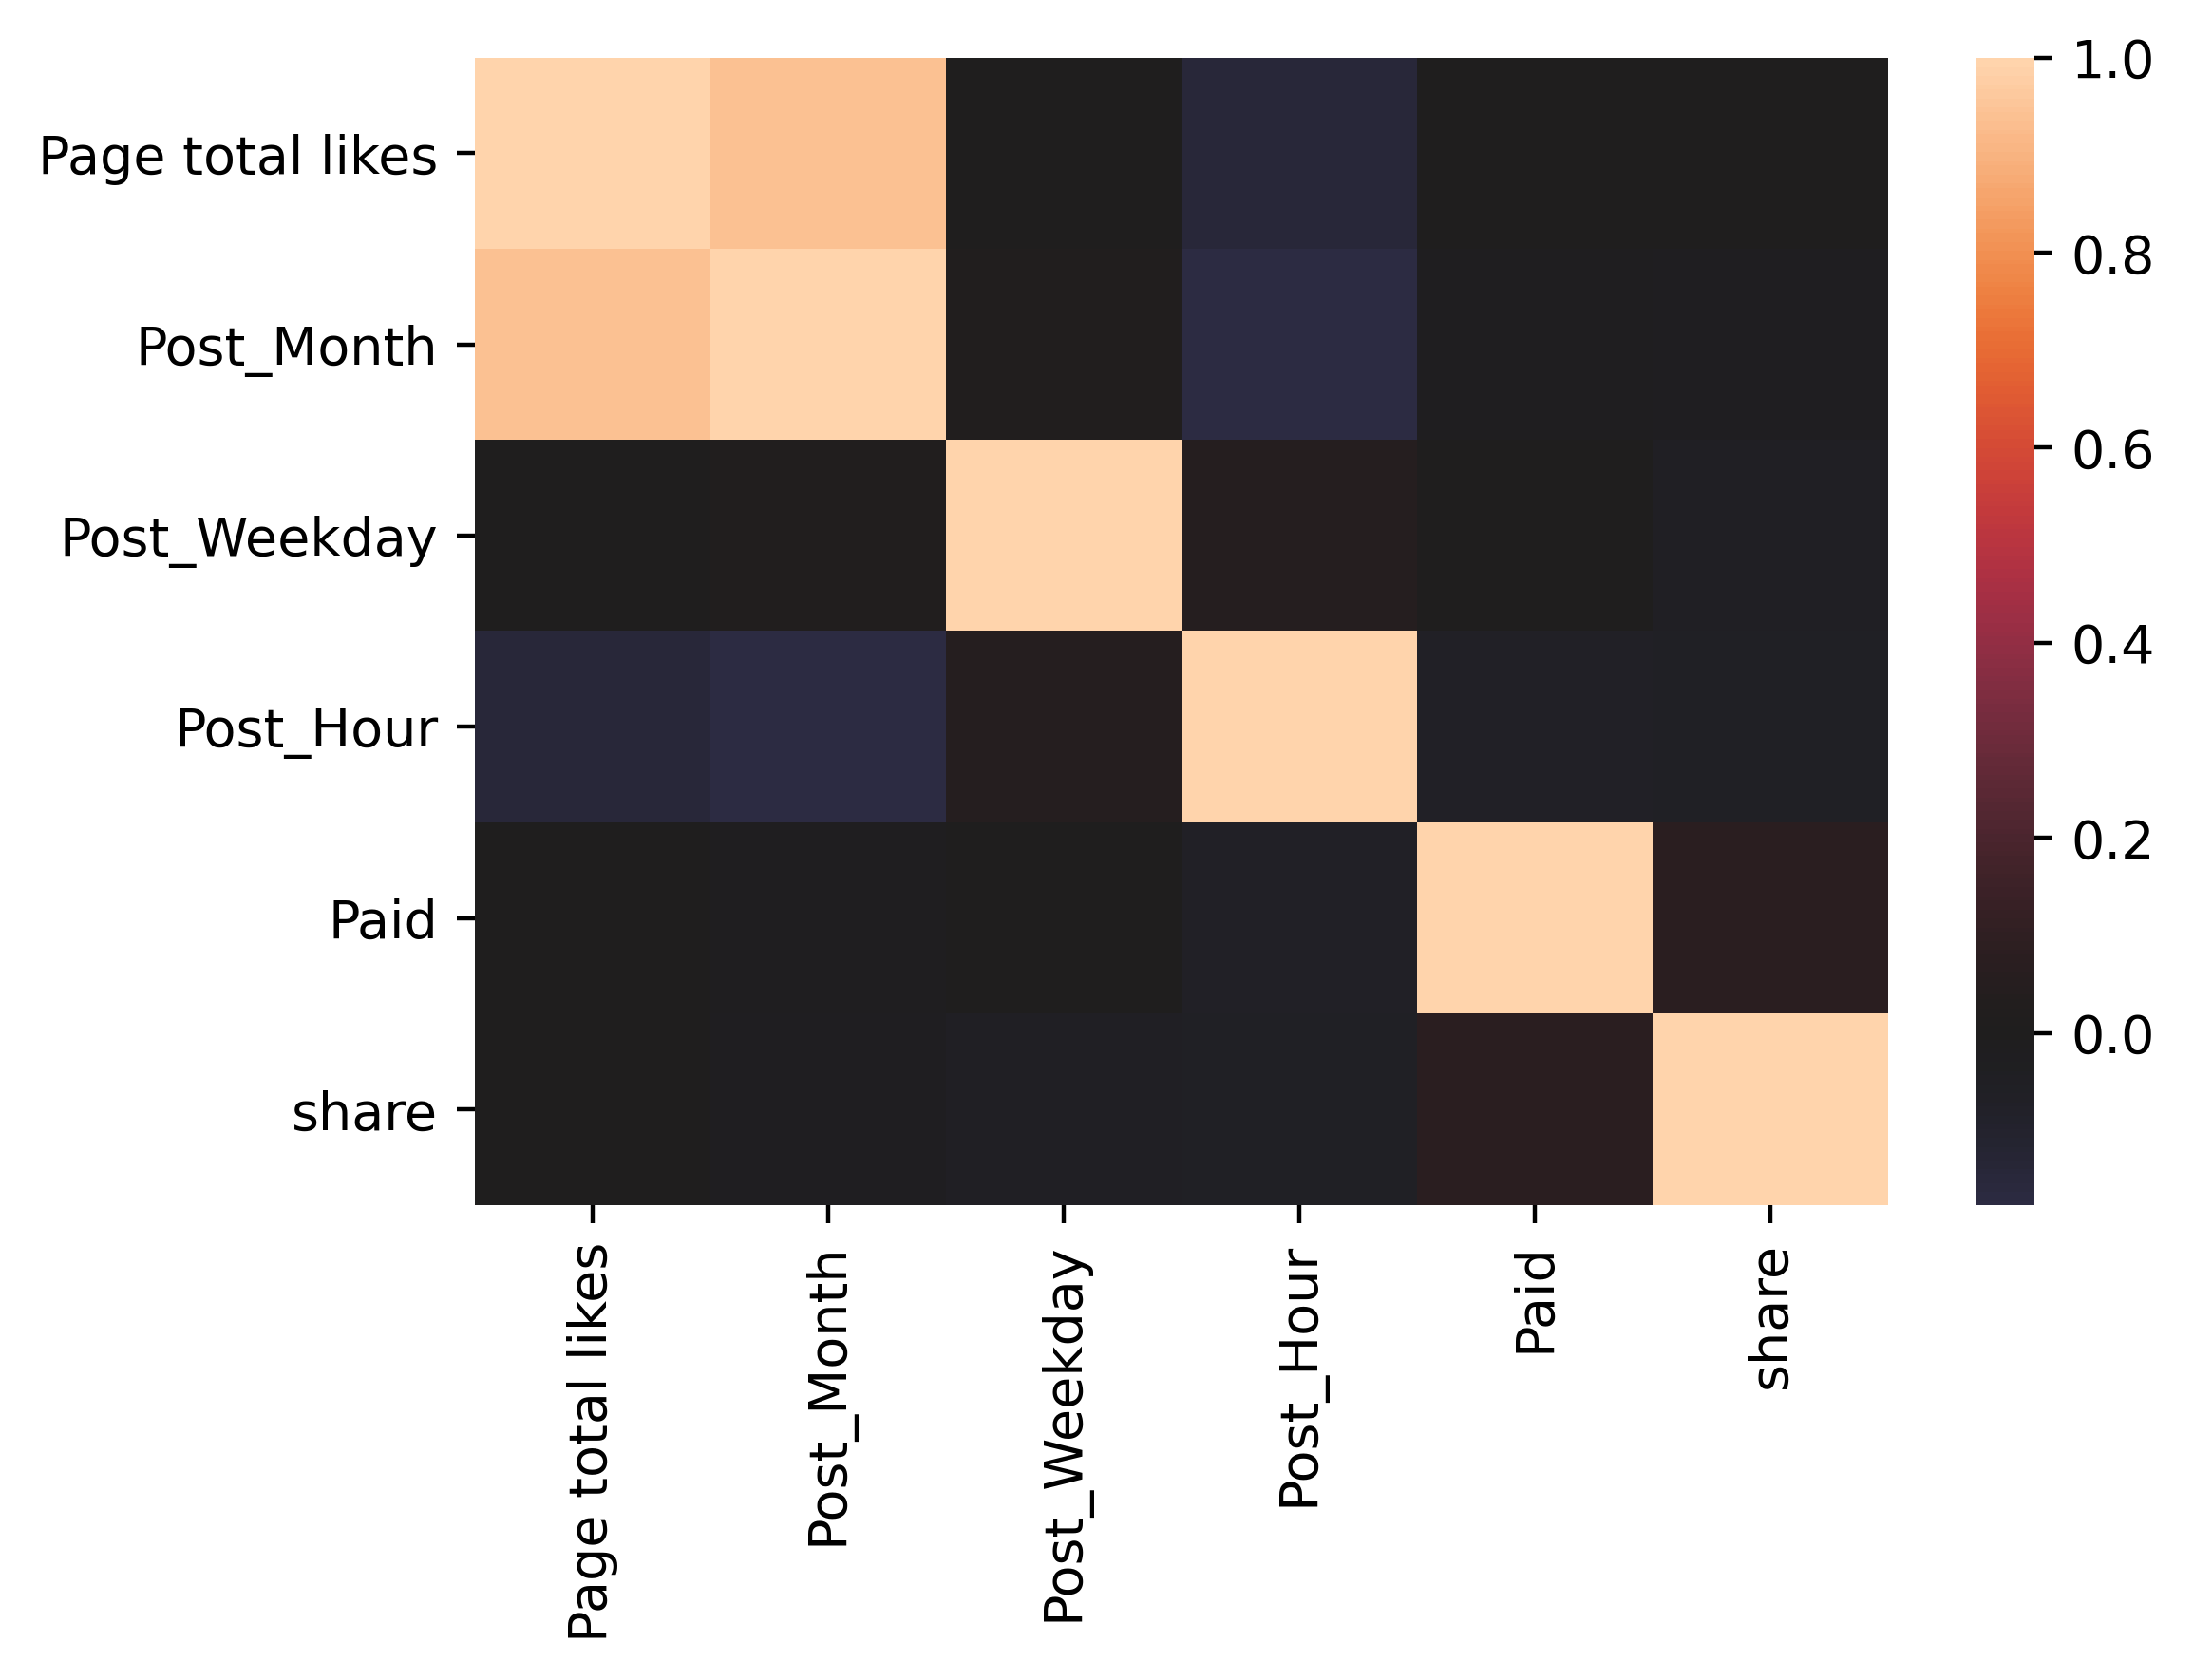

In [29]:
mpl.rcParams['figure.dpi'] = 400 #figura com alta resolução
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)

Exercise 11: F-test and Univariate Feature Selection¶


In [30]:
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(500, 6) (500,)


In [31]:
from sklearn.feature_selection import f_classif

#SVR

In [2]:
import pandas as pd

In [3]:
df2 = pd.read_csv('facebook_5_5.csv')

In [4]:
df2.shape

(425, 1)

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 1 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   139441;Photo;2;12;4;3;0;2752;5091;178;109;159;3078;1640;119;4;79;17;100  425 non-null    object
dtypes: object(1)
memory usage: 3.4+ KB
